In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys

print(sys.path)

['/home/caleml/partial-labels/experiments/notebooks', '/home/caleml/partial-labels', '/usr/lib/python36.zip', '/usr/lib64/python3.6', '/usr/lib64/python3.6/lib-dynload', '', '/home/caleml/.local/lib/python3.6/site-packages', '/usr/lib64/python3.6/site-packages', '/usr/lib64/python3.6/_import_failed', '/usr/lib/python3.6/site-packages', '/usr/lib/python3.6/site-packages/IPython/extensions', '/home/caleml/.ipython']


In [3]:
import numpy as np
import tensorflow as tf

In [4]:
from data.pascalvoc.pascalvoc import PascalVOC, NB_CLASSES

Using TensorFlow backend.


In [5]:
from model.networks.baseline import Baseline
from model import metrics

In [6]:
import matplotlib
import matplotlib.pyplot as plt

In [7]:
import sklearn
sklearn.__version__

'0.21.3'

In [8]:
from experiments.launch import parse_options_file
from config import config_utils

ImportError: cannot import name 'parse_options_file'

## val dataset

In [ ]:
dataset_path = '/share/DEEPLEARNING/datasets/pascalvoc/'
dataset_val = PascalVOC(dataset_path, 2510, 'val', x_keys=['image'], y_keys=['multilabel'])
print(len(dataset_val))

In [ ]:
x_val, y_val = dataset_val[0]

## eval

In [ ]:
# partial_folder = '/home/caleml/partial_experiments/exp_20190624_1613_baseline'
partial_folder = '/home/caleml/partial_experiments/exp_20190627_1641_baseline'
model_weights = {
    # 'model_10': os.path.join(partial_folder, 'weights_10_006.h5'),
    # 'model_20': os.path.join(partial_folder, 'weights_20_020.h5'),
    # 'model_30': os.path.join(partial_folder, 'weights_30_003.h5'),
    'model_100': '/home/caleml/partial_experiments/exp_20190621_1834_baseline/weights_007.h5'
}

In [ ]:
# config loading
# conf = parse_options_file(os.path.join(partial_folder, 'config.yaml'))
conf = parse_options_file('/home/caleml/partial-labels/config/baseline101.yaml')
config_utils.update_config(conf)

In [ ]:
# eval loop

for model_name, model_path in model_weights.items():
    print('Doing model %s' % model_name)  
    model = Baseline(None, NB_CLASSES)
    model.load_weights(model_path)
    
    y_pred = model.predict(x_val)
    print('y pred example %s' % str(y_pred[0]))
    
    map_metric = metrics.MAP()
    map_2 = metrics.calculate_map(y_val[0], y_pred)
    print('map2 %s' % map_2)
    ap_scores = map_metric.compute_separated(y_val[0], y_pred)
    # ap_scores = map_metric.compute_separated(y_pred, y_val[0])
    print('ap scores for %s: %s' % (model_name, str(ap_scores)))
    map_score = sum(ap_scores) / len(ap_scores)

    print('%s: %s' % (model_name, map_score))

In [ ]:
# print(y_val)
print(type(y_val[0]))
print(y_val[0].shape)
print(y_pred_100.shape)

print(y_pred_100[-1])
print(y_pred_100[2])

print(y_pred_10[-1])
print(y_pred_10[2])

print(y_pred_20[-1])
print(y_pred_20[2])

In [ ]:
print(y_val[0][0])

## plot mAP

In [ ]:
folder = '%s/partial_experiments/exp_20190628_0305_TEST_script' % os.environ['HOME']

In [ ]:
from pprint import pprint

In [ ]:
maps = dict()
exp_pct = 0
exp_maps = None

with open(os.path.join(folder, 'map.csv'), 'r') as f_in:
    for line in f_in:
        parts = line.split(',')
        epoch = parts[0]
        mAP = parts[1]
        
        if int(epoch) == 0:
            if exp_maps is not None:
                maps[exp_pct] = exp_maps
            
            exp_pct += 10
            exp_maps = list()
        
        exp_maps.append(mAP)
        
pprint(maps)
            
            
            
        

In [ ]:
mAP_100 = 0.69

In [ ]:
# Data for plotting
x = sorted(list(maps.keys()))
y = [float(maps[k][-1]) for k in x]

x += [100]
y += [mAP_100]

fig, ax = plt.subplots()
ax.plot(x, y)

ax.set(xlabel='% known labels', ylabel='mAP')
ax.grid()

fig.savefig("test.png")
plt.show()

## partial vs bce

In [ ]:
bce = {
    100: '/home/caleml/partial_experiments/exp_20190722_1214_baseline',
    90: '/home/caleml/partial_experiments/exp_20190722_1233_baseline',
    80: '/home/caleml/partial_experiments/exp_20190722_1413_baseline',
    70: '/home/caleml/partial_experiments/exp_20190722_1233_baseline',
    60: '/home/caleml/partial_experiments/exp_20190722_1413_baseline',
    50: '/home/caleml/partial_experiments/exp_20190722_1233_baseline',
    40: '/home/caleml/partial_experiments/exp_20190722_1413_baseline',
    30: '/home/caleml/partial_experiments/exp_20190722_1233_baseline',
    20: '/home/caleml/partial_experiments/exp_20190722_1413_baseline',
    10: '/home/caleml/partial_experiments/exp_20190722_1233_baseline'
}

partial = {
    100: '/home/caleml/partial_experiments/exp_20190722_1208_TESTNB',
    90: '/home/caleml/partial_experiments/exp_20190722_1235_TESTNB',
    80: '/home/caleml/partial_experiments/exp_20190722_1434_baseline/',
    70: '/home/caleml/partial_experiments/exp_20190722_1318_baseline',
    60: '/home/caleml/partial_experiments/exp_20190722_1416_TESTNB',
    50: '/home/caleml/partial_experiments/exp_20190722_1346_TESTNB',
    40: '/home/caleml/partial_experiments/exp_20190722_1359_baseline',
    30: '/home/caleml/partial_experiments/exp_20190722_1350_baseline',
    20: '/home/caleml/partial_experiments/exp_20190722_1444_baseline',
    # 10: '/home/caleml/partial_experiments/exp_20190722_1257_TESTNB'
}

In [ ]:
coco_partial = {
    100: '/home/caleml/partial_experiments/tensorboard/exp_20190723_0029_baseline',
    90: '/home/caleml/partial_experiments/exp_20190723_0133_baseline'
}

coco_bce= {
    100: '/home/caleml/partial_experiments/exp_20190723_0050_TESTNB',
    90: '/home/caleml/partial_experiments/exp_20190723_0130_baseline'
}

In [ ]:
# PascalVOC 448 + LRS (sgd 0.01 -> 0.001@10)
pv_bce = {
    100: '/home/caleml/partial_experiments/exp_20190725_1516_baseline',
    90: '/home/caleml/partial_experiments/exp_20190725_1710_baseline',
    # 80: '/home/caleml/partial_experiments/exp_20190726_1531_baseline',
    70: '/home/caleml/partial_experiments/exp_20190725_1710_baseline',
    # 60: '/home/caleml/partial_experiments/exp_20190726_1531_baseline',
    50: '/home/caleml/partial_experiments/exp_20190725_1710_baseline',
    # 40: '/home/caleml/partial_experiments/exp_20190726_1531_baseline',
    30: '/home/caleml/partial_experiments/exp_20190726_1126_baseline',
    20: '/home/caleml/partial_experiments/exp_20190726_1126_baseline',
    10: '/home/caleml/partial_experiments/exp_20190726_1126_baseline'
    
}

pv_pbce = {
    100: '/home/caleml/partial_experiments/exp_20190726_1141_baseline',
    90: '/home/caleml/partial_experiments/exp_20190725_1711_baseline',
    # 80: '/home/caleml/partial_experiments/exp_20190726_1532_baseline',
    70: '/home/caleml/partial_experiments/exp_20190725_1711_baseline',
    # 60: '/home/caleml/partial_experiments/exp_20190726_1532_baseline',
    50: '/home/caleml/partial_experiments/exp_20190725_1711_baseline',
    40: '/home/caleml/partial_experiments/exp_20190726_1532_baseline',
    30: '/home/caleml/partial_experiments/exp_20190725_1711_baseline',
    20: '/home/caleml/partial_experiments/exp_20190726_1127_baseline',
    10: '/home/caleml/partial_experiments/exp_20190726_1127_baseline'
}

In [ ]:
# MSCoco 448 + LRS (sgd 0.01 -> 0.001@10)
cc_bce = {
    100: '/home/caleml/partial_experiments/exp_20190729_1635_baseline',
    90: '/home/caleml/partial_experiments/exp_20190729_1718_baseline',
    70: '/home/caleml/partial_experiments/exp_20190730_1451_baseline',
    50: '/home/caleml/partial_experiments/exp_20190731_1119_baseline'
}

cc_pbce = {
    100: '/home/caleml/partial_experiments/exp_20190729_1614_baseline',
    90: '/home/caleml/partial_experiments/exp_20190729_1720_baseline',
    70: '/home/caleml/partial_experiments/exp_20190730_1452_baseline'
}

In [ ]:
def find_map_data(folders):
    # key: percent // val: best mAP
    maps = dict()
    
    for pct, exp_folder in folders.items():
        best_epoch = None
        best_map = 0
        
        with open(os.path.join(exp_folder, 'map.csv'), 'r') as f_in:
        
            for line in f_in:
                parts = line.split(',')

                if len(parts) == 23:
                    if int(parts[0]) != pct:
                        continue
                    epoch = int(parts[1])
                    mAP = float(parts[2])

                elif len(parts) == 22:
                    epoch = int(parts[0])
                    mAP = float(parts[1])
                    
                if mAP > best_map:
                    best_map = mAP
                    best_epoch = epoch

        print("for percent %s, best map is %s at epoch %s" % (pct, best_map, best_epoch))
        maps[pct] = best_map
    
    return maps

In [ ]:
bce_maps = find_map_data(pv_bce)
partial_maps = find_map_data(pv_pbce)

In [ ]:
# Data for plotting
x_bce = sorted(list(bce_maps.keys()))
y_bce = [float(bce_maps[k]) for k in x_bce]

x_partial = sorted(list(partial_maps.keys()))
y_partial = [float(partial_maps[k]) for k in x_partial]


fig, ax = plt.subplots()
ax.plot(x_bce, y_bce, label='bce')
ax.plot(x_partial, y_partial, label='partial-bce')

ax.set(xlabel='% known labels', ylabel='mAP')
ax.legend()
ax.grid()

fig.savefig("eval_partial.png")
plt.show()

## Load and compute

In [ ]:
from data.coco.coco import CocoGenerator


In [ ]:
prop = 100

In [ ]:
data_dir = '/share/DEEPLEARNING/datasets/mscoco'
# data_dir = '/home/caleml/datasets/mscoco'
dataset_test = CocoGenerator('val', data_dir)

In [ ]:
# BatchNormalizationV1??
from tensorflow.keras.models import load_model
model_path = '/home/caleml/partial_experiments/exp_20190729_1614_baseline/model_100_020.h5'
model = load_model(model_path)

In [ ]:
# load model
weights_path = '/home/caleml/partial_experiments/exp_20190729_1614_baseline/weights_100_020.h5'
config_path = '/home/caleml/partial-labels/config/coco_baseline50_sgd_448lrs.yaml'
model = Baseline('/home/caleml/partial_experiments/', 80)
model.load_weights(weights_path, build_args={'p': prop / 100}, config_file=config_path)

In [ ]:
# load val dataset (/!\ LONG)
batch_size = len(dataset_test)
generator_test = dataset_test.flow(batch_size=batch_size)
print("test data length %s" % len(dataset_test))
X_test, Y_test = next(generator_test)

In [ ]:
# execute mAP measures
from model import metrics
map_fn =  metrics.MAP()

y_pred = model.predict(X_test)
ap_scores = map_fn.compute_separated(Y_test, y_pred)
print('ap scores type %s' % type(ap_scores))
map_score = sum(ap_scores) / len(ap_scores)

with open(os.path.join(self.exp_folder, 'map.csv'), 'a') as f_out:
    line = '%d,%d,%6f,' % (prop, epoch, map_score) + ','.join([str(s) for s in ap_scores]) + '\n'
    f_out.write(line)

print("interval evaluation - epoch: {:d} - mAP score: {:.6f}".format(epoch, map_score))

In [ ]:
def extract_folder_and_epoch(weights_path):
    parts = weights_path.split('/')
    parts_name = parts[-1].split('_')
    assert len(parts_name) == 3
    epoch = int(parts_name[1])
    
    exp_folder = '/'.join(parts[:-1])
    return exp_folder, epoch

In [ ]:
exp_folder, epoch = extract_folder_and_epoch(weights_path)
print(exp_folder)
print(epoch)

## Test eval stream

In [ ]:
from data.coco.coco2 import CocoGenerator

In [ ]:
data_dir = '/home/caleml/datasets/mscoco/'

In [ ]:
dataset_val = CocoGenerator(data_dir, 16, 'val', x_keys=['image', 'image_id'], y_keys=['multilabel'], year='2014')

### model

In [ ]:
prop = 100

In [ ]:
weights_path = '/home/caleml/partial_experiments/exp_20190729_1614_baseline/weights_%s_020.h5' % prop
model = Baseline('/home/caleml/partial_experiments/', 80)
model.load_weights(weights_path)

### predictions

In [ ]:
y_test_stacked = list()
y_pred_stacked = list()

for i in range(len(dataset_val)):
    if i % 10 == 0:
        print('done %s/%s' % (i, len(dataset_val)))
        
    x_batch, y_batch = dataset_val[i]
    y_pred = model.predict(x_batch)
    
    y_test_stacked.append(y_batch[0])
    y_pred_stacked.append(y_pred)

In [ ]:
y_test = np.vstack(y_test_stacked)
y_pred = np.vstack(y_pred_stacked)

print(y_test.shape)
print(y_pred.shape)

### mAP

In [ ]:
from model.metrics.map import MAP
map_fn =  MAP()

ap_scores = map_fn.compute_separated([y_test], y_pred)
print('ap scores type %s' % type(ap_scores))
map_score = sum(ap_scores) / len(ap_scores)
print('map score %s' % map_score)

## multi eval (writing in map.csv)

In [ ]:
a = [0, 1, -1, 1, 0, 0]
b = [1, 1, -1, 1, 1, 0]
c = [-1, 1, -1, 1, 1, 0]

d = np.where(a == 0, )

In [ ]:
a = (2, 3)
b = a + (4,)
print(a)
print(b)

In [ ]:
a = 0.87
b = 0.67

c = a / (a + b)
d = b / (a + b)
print(c)
print(d)
print(c + d)

In [ ]:
def eval_model(exp_folder, prop='all', epoch='20'):
    
    # first create the list of all model weights to be evaluated
    eval_weights = list()
    for filename in os.path.listdir(exp_folder):
        
    weights_path = '/home/caleml/partial_experiments/exp_20190729_1614_baseline/weights_%s_020.h5' % prop
    
    # for each weight file create a new model
    for 
    model = Baseline('/home/caleml/partial_experiments/', 80)
    model.load_weights(weights_path)
    

In [ ]:
import numpy as np
a = np.array([0, 1, -1, 1, 0, 0])
b = np.array([0.23, 0.56, 0.009, 0.890, 0.9876, 0.011])

c = np.where((a == 0) & (b > 0.5), b, 0)

In [ ]:
c

In [ ]:
a = np.random.random((8, 20, 2))

In [ ]:
b = a[:,:,1]
b.shape

In [ ]:
sk = np.random.random((8, 20))

In [ ]:
sk_0 = 1 - sk

In [ ]:
print(sk[0])
print(sk_0[0])

## plotting epoch values for one percentage

In [26]:
BASE_DIR = '/home/caleml/partial_experiments'

In [27]:
def get_map(map_path, pct, step_range=None):
    # key: epoch // val: mAP
    maps = dict()
    best_map = 0
    best_epoch = None
    
    if not map_path.startswith('/'):
        map_path = os.path.join(BASE_DIR, map_path)
    
    with open(map_path, 'r') as f_in:

        for line in f_in:
            parts = line.split(',')

            if int(parts[0]) != pct:
                continue
                
            epoch = int(parts[1])
            mAP = float(parts[2])
            
            if step_range is not None:
                if epoch < step_range[0] or epoch >= step_range[1]:
                    continue
            
            maps[epoch] = mAP

            if mAP > best_map:
                best_map = mAP
                best_epoch = epoch

    range_info = '' if step_range is None else '(range %s)' % str(step_range)
    print("for percent %s %s, best map is %s at epoch %s" % (pct, range_info, best_map, best_epoch))
    
    return maps

In [17]:
def get_plotting_data(exps_dict, percent, steps=None):
    # Data for plotting
    data = dict()

    for exp_name, exp_mapfile in exps_dict.items():
        
        if steps is None:
            maps = get_map(exp_mapfile, percent)
            x_maps = sorted(list(maps.keys()))
        
            data[exp_name] = {'x': x_maps,
                              'y': [float(maps[k]) for k in x_maps]}
        else:
            first_step = 0
            for step in steps + [100]:
                exp_name += '_step%s' % step
                maps = get_map(exp_mapfile, percent, step_range=(first_step, step))
                x_maps = np.array(sorted(list(maps.keys())))
                
                data[exp_name] = {
                    'x': x_maps + step,
                    'y': [float(maps[k]) for k in x_maps]
                }
                first_step = step
                
    return data


In [18]:
# plotting
def actual_plot(data, title=None):
    fig, ax = plt.subplots()
    for name, val in data.items():
        ax.plot(val['x'], val['y'], label=name)

    ax.set(xlabel='epoch', ylabel='mAP')
    ax.legend()
    ax.grid()

    fig.suptitle(title)
    fig.savefig(title)
        
    plt.show()

In [36]:
def get_map_filenames(folder):
    filenames = list()
    for filename in os.listdir(os.path.join(BASE_DIR, folder)):
        if filename.startswith('map') and filename.endswith('.csv'):
            filenames.append(filename)
    
    return {'part%s' % i: '%s/%s' % (folder, filename) for i, filename in enumerate(sorted(filenames))}

In [37]:
def plot_exps(folder):
    exps = get_map_filenames(folder)
    print(exps)
    data = get_plotting_data(exps, percent)
    actual_plot(data, folder)

## Viz mAP per epoch

In [38]:
percent = 10

{'part0': 'exp_20190925_1239_baseline/map.csv', 'part1': 'exp_20190925_1239_baseline/map1.csv'}
for percent 10 , best map is 0.74859 at epoch 19
for percent 10 , best map is 0.759602 at epoch 2


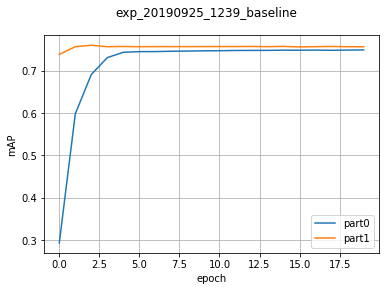

In [39]:
# two steps
plot_exps('exp_20190925_1239_baseline')

{'part0': 'exp_20190925_1745_baseline_logits/map.csv', 'part1': 'exp_20190925_1745_baseline_logits/map1.csv', 'part2': 'exp_20190925_1745_baseline_logits/map2.csv'}
for percent 10 , best map is 0.751632 at epoch 9
for percent 10 , best map is 0.764845 at epoch 4
for percent 10 , best map is 0.766318 at epoch 3


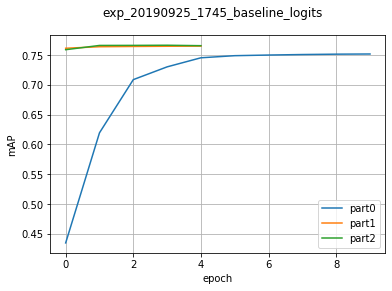

In [40]:
# baseline strat A
plot_exps('exp_20190925_1745_baseline_logits')

{'part0': 'exp_20190925_1833_baseline_logits/map.csv', 'part1': 'exp_20190925_1833_baseline_logits/map1.csv', 'part2': 'exp_20190925_1833_baseline_logits/map2.csv'}
for percent 10 , best map is 0.748432 at epoch 9
for percent 10 , best map is 0.754357 at epoch 4
for percent 10 , best map is 0.736456 at epoch 4


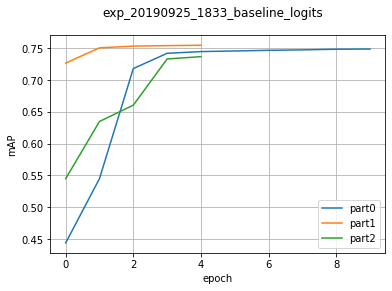

In [41]:
# baseline strat C
plot_exps('exp_20190925_1833_baseline_logits')

{'part0': 'exp_20190926_1045_baseline_logits/map.csv', 'part1': 'exp_20190926_1045_baseline_logits/map1.csv', 'part2': 'exp_20190926_1045_baseline_logits/map2.csv'}
for percent 10 , best map is 0.760145 at epoch 9
for percent 10 , best map is 0.763318 at epoch 4
for percent 10 , best map is 0.771762 at epoch 4


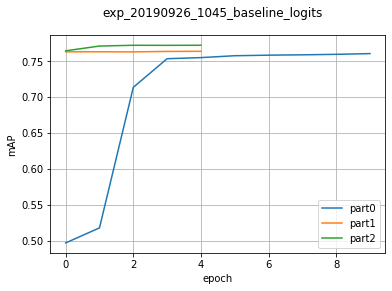

In [42]:
# baseline strat B
plot_exps('exp_20190926_1045_baseline_logits')

{'part0': 'exp_20190926_1624_baseline_logits/map.csv', 'part1': 'exp_20190926_1624_baseline_logits/map1.csv', 'part2': 'exp_20190926_1624_baseline_logits/map2.csv'}
for percent 10 , best map is 0.652678 at epoch 9
for percent 10 , best map is 0.655586 at epoch 4
for percent 10 , best map is 0.661988 at epoch 2


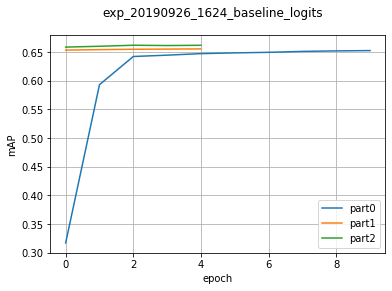

In [45]:
# scenario B different split
plot_exps('exp_20190926_1624_baseline_logits')

{'part0': 'exp_20191001_1703_baseline_logits/map.csv', 'part1': 'exp_20191001_1703_baseline_logits/map1.csv', 'part2': 'exp_20191001_1703_baseline_logits/map2.csv'}
for percent 10 , best map is 0.761388 at epoch 9
for percent 10 , best map is 0.68572 at epoch 2
for percent 10 , best map is 0.645665 at epoch 1


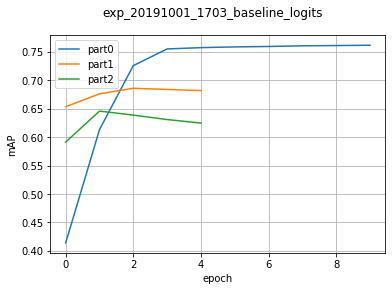

In [44]:
# test prior2 40 / 40
plot_exps('exp_20191001_1703_baseline_logits')

{'part0': 'exp_20191007_1907_baseline_logits/map.csv', 'part1': 'exp_20191007_1907_baseline_logits/map1.csv', 'part2': 'exp_20191007_1907_baseline_logits/map2.csv'}
for percent 10 , best map is 0.746745 at epoch 9
for percent 10 , best map is 0.671099 at epoch 2
for percent 10 , best map is 0.62467 at epoch 2


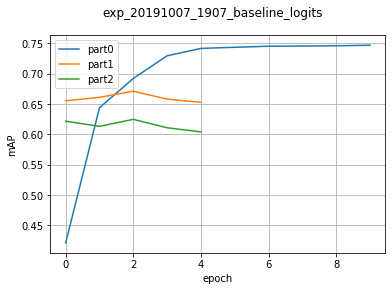

In [46]:
# test prior3 40/40
plot_exps('exp_20191007_1907_baseline_logits')